## TLombardi
### Lesson 5 Homework

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from scipy.stats import entropy
from sklearn import model_selection, tree, metrics, preprocessing

## Part 1: Lecture 5 Follow-up

### 1. Submit a Jupyter notebook that uses scipy to calculate Η([9,4]) and Η([3,3])

In [2]:
# Calculate Η([9,4])
entropy([9/13, 4/13], base=2)

0.8904916402194913

In [3]:
# Calculate Η([3,3])
entropy([3/6, 3/6], base=2)

1.0

## Part 2: Lesson 5 Jupyter Notebook Follow-up

### 2. Update the Lesson05 Jupyter notebook to use sklearn.preprocessing.LabelEncoder rather than pandas factorize

Download the [Car Evaluation Data](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation) and check out the [description](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names).

In [4]:
# Read the downloaded car data. Since there is no header to the data, we will assign explicitly column names.
df = pd.read_csv('C:/Users/TVL/Desktop/JHU/SP20_GeoAI/Lesson05/Assignment5Data/car.data', 
                 names=['buying',
                        'maint',
                        'doors',
                        'persons',
                        'lug_boot',
                        'safety',
                        'clazz'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,clazz
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Check the data size and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
clazz       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


We will be using the [scikit-learn tree](https://scikit-learn.org/stable/modules/tree.html) module.
This requires that all data be converted to integer values. Let's use [pandas.factorize](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.factorize.html) for string to integer labeling.

In [6]:
#### example methods
# String to label with pandas.factorize
# df.buying, _ = pd.factorize(df.buying)
# df.maint, _ = pd.factorize(df.maint)
# df.doors, _ = pd.factorize(df.doors)
# df.persons, _ = pd.factorize(df.persons)
# df.lug_boot, _ = pd.factorize(df.lug_boot)
# df.safety, _ = pd.factorize(df.safety)
df.clazz, clazz_names = pd.factorize(df.clazz)  # Note here, I'm saving the names for later use!
df.head()
#####

,buying,maint,doors,persons,lug_boot,safety,clazz
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [7]:
# Validate dependent variable names are saved
clazz_names

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')

In [8]:
# Workaround for using label encoder on more than 1 column
df.apply(preprocessing.LabelEncoder().fit_transform)

,buying,maint,doors,persons,lug_boot,safety,clazz
0,3,3,0,0,2,1,0
1,3,3,0,0,2,2,0
2,3,3,0,0,2,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,3
1724,1,1,3,2,1,0,2
1725,1,1,3,2,0,1,0
1726,1,1,3,2,0,2,3


In [9]:
# Using dictionary to store labels
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [10]:
# Encoding the variable with lambda function
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Using the dictionary to classify future data
df = df.apply(lambda x: d[x.name].transform(x))

In [11]:
# Inverse the encoded to restore labels
#fit.apply(lambda x: d[x.name].inverse_transform(x))

In [12]:
# Extract independent (X) and dependent (y) variables.
X = df.iloc[:,:-1]  # Everything but the last column
y = df.iloc[:,-1]  # The last column

In [13]:
# Create training (80%) and validation data (20%)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, 
                                                                      y, 
                                                                      test_size=0.2, 
                                                                      random_state=42)

In [14]:
# Create decision tree classifier using 'gini' method for information gain,
# and set the max tree depth to 3.
dtc = tree.DecisionTreeClassifier(criterion='gini', 
                                  max_depth=3,
                                  random_state=42)

In [15]:
# Run the training data through the classifier.
dtc = dtc.fit(X_train, y_train)

In [16]:
# Run validation
y_pred = dtc.predict(X_valid)
metrics.accuracy_score(y_pred, y_valid)

0.7427745664739884

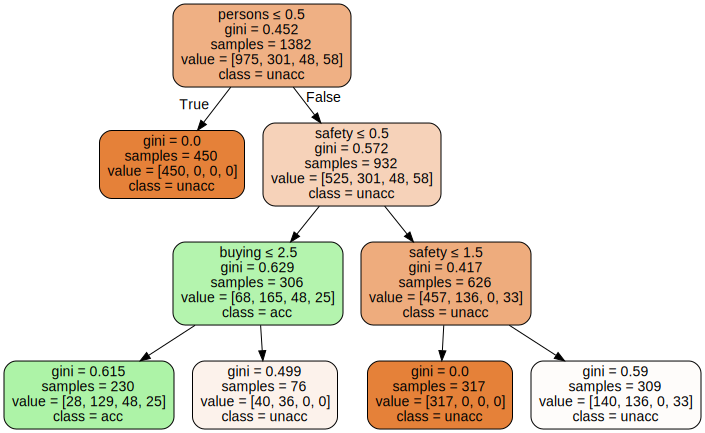

In [17]:
# Visualize the tree
dot_data = tree.export_graphviz(dtc,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=clazz_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### 3. Adjust classifier parameters of the classifier parameters from Lesson05 Jupyter notebook to produce a better accuracy.

In [18]:
# set max_depth to default parameter (None)
dtc_better = tree.DecisionTreeClassifier(criterion='gini',
                                         random_state=42)
dtc_better = dtc_better.fit(X_train, y_train)

In [19]:
# Better performance quantified
y_pred = dtc_better.predict(X_valid)
metrics.accuracy_score(y_pred, y_valid)

0.9739884393063584

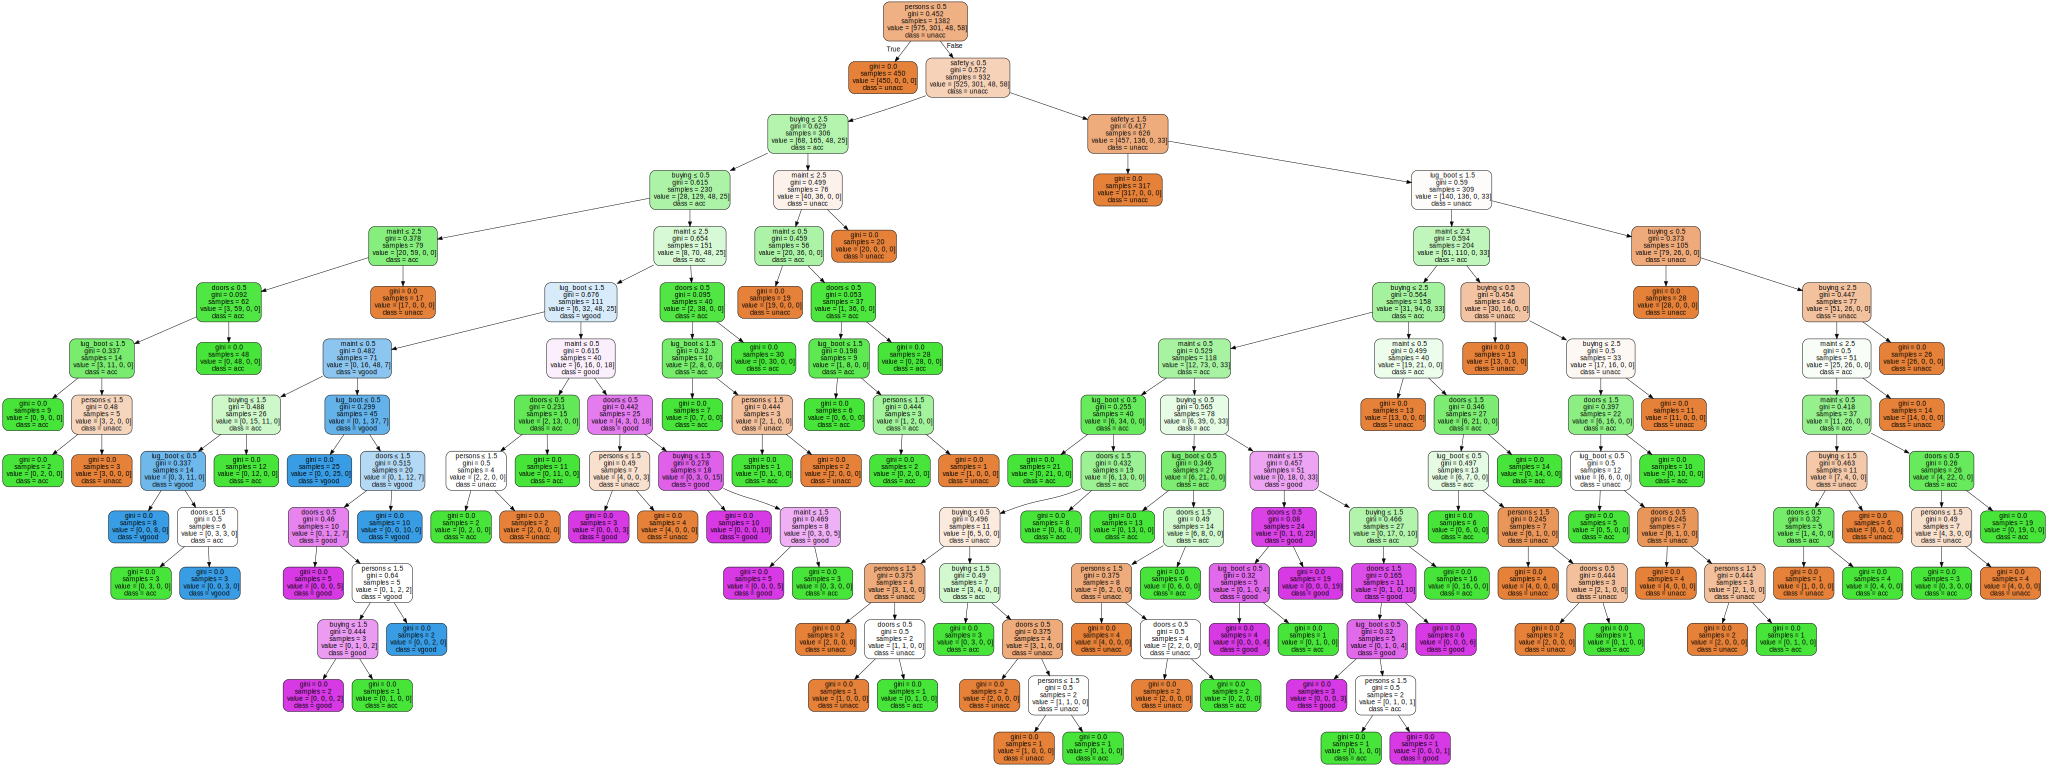

In [20]:
# Visualize decision tree
dot_data = tree.export_graphviz(dtc_better,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=clazz_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Part 3: Real World Example

### 4. Download [airline data](https://github.com/h2oai/h2o-2/blob/master/smalldata/airlines/allyears2k_headers.zip) for 2000

In [21]:
# Read the downloaded car data. Since there is no header to the data, we will assign explicitly column names.
df2 = pd.read_csv('C:/Users/TVL/Desktop/JHU/SP20_GeoAI/Lesson05/Assignment5Data/allyears2k_headers/allyears2k_headers.csv', 
                  usecols=['IsDepDelayed', 
                           'DayofMonth', 
                           'DayOfWeek'])
df2.head()

,DayofMonth,DayOfWeek,IsDepDelayed
0,14,3,YES
1,15,4,NO
2,17,6,YES
3,18,7,NO
4,19,1,YES


In [22]:
# Verify DataFrame contents
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43978 entries, 0 to 43977
Data columns (total 3 columns):
DayofMonth      43978 non-null int64
DayOfWeek       43978 non-null int64
IsDepDelayed    43978 non-null object
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


Text(0.5, 0, 'Day of the Week')

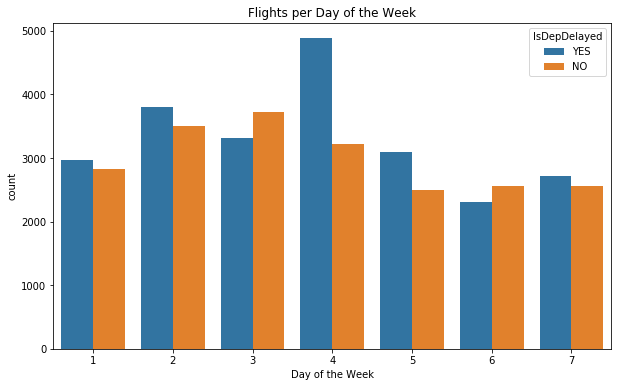

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Flights per Day of the Week")

# Bar chart showing total counts of pickup days of the week
sns.countplot('DayOfWeek', hue='IsDepDelayed', data=df2)

# Add label for vertical axis
plt.xlabel("Day of the Week")

Text(0.5, 0, 'Day of the Week')

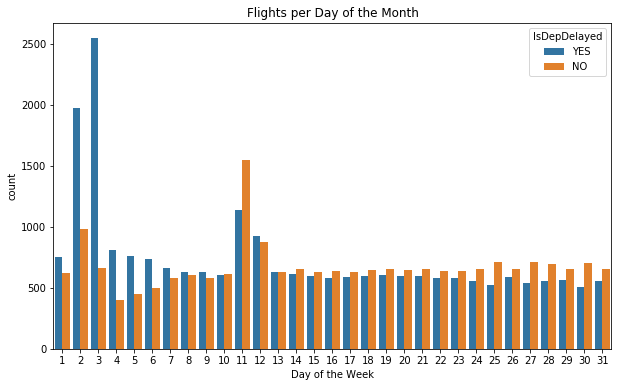

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Flights per Day of the Month")

# Bar chart showing total counts of pickup days of the week
sns.countplot('DayofMonth', hue='IsDepDelayed', data=df2)

# Add label for vertical axis
plt.xlabel("Day of the Week")

In [26]:
# Save dependent variable names for later
df2.IsDepDelayed, IsDepDelayed_names = pd.factorize(df2.IsDepDelayed) 

### 5. Train a classifier to predict ‘IsDepDelayed’ from ‘DayOfMonth’ and ‘DayOfWeek’, submit the trained model and its accuracy as a Jupyter notebook

In [27]:
# Encoding the variable with lambda function
fit = df2.apply(lambda x: d[x.name].fit_transform(x))

# Using the dictionary to classify future data
df3 = df2.apply(lambda x: d[x.name].transform(x))
df3

,DayofMonth,DayOfWeek,IsDepDelayed
0,13,2,0
1,14,3,1
2,16,5,0
3,17,6,1
4,18,0,0
...,...,...,...
43973,2,3,0
43974,2,3,0
43975,2,3,1
43976,2,3,0


In [28]:
# Extract independent (X) and dependent (y) variables.
X = df3.iloc[:,:-1]  # Everything but the last column
y = df3.iloc[:,-1]  # The last column

In [29]:
# Create training (80%) and validation data (20%)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, 
                                                                      y, 
                                                                      test_size=0.2, 
                                                                      random_state=42)

In [45]:
# Create decision tree classifier using 'gini' method for information gain,
# and set the max tree depth to 3. Run the training data through the 
# classifier.
dtc2 = tree.DecisionTreeClassifier(criterion='entropy', 
                                   max_depth=1,
                                   random_state=42)
dtc2 = dtc2.fit(X_train, y_train)

In [46]:
# Run validation
y_pred = dtc2.predict(X_valid)
metrics.accuracy_score(y_pred, y_valid)

0.567530695770805

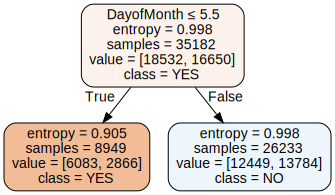

In [47]:
# Visualize the tree
dot_data = tree.export_graphviz(dtc2,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=IsDepDelayed_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph